# **1. Perkenalan Dataset**


<h1>  Dataset Depresi Mahasiswa </h1>

<h3>  Menganalisis Tren Kesehatan Mental dan Faktor Penyebab Depresi </h3>

Dataset ini digunakan untuk menganalisis **faktor-faktor** yang mempengaruhi **depresi** di kalangan **mahasiswa**. Data mencakup informasi demografis, prestasi akademik, kebiasaan hidup, dan faktor-faktor lain yang berhubungan dengan **kesehatan mental**. Dataset ini diperoleh dari **Kaggle** dan merupakan **data sekunder**.


<h3> Struktur File </h3>

- **Format**: CSV
- **Baris**: Setiap baris mewakili satu mahasiswa.
- **Kolom**: Setiap kolom mewakili atribut tertentu.

---

<h2> Penjelasan Kolom </h2>

| **Nama Kolom**        | **Deskripsi**                                                       |
|-----------------------|---------------------------------------------------------------------|
| **ID**                | ID unik untuk setiap mahasiswa.                                     |
| **Age**               | Usia mahasiswa.                                                     |
| **Gender**            | Jenis kelamin mahasiswa (misal: Laki-laki, Perempuan).               |
| **City**              | Kota tempat tinggal mahasiswa.                                       |
| **CGPA**              | Nilai rata-rata akademik mahasiswa.                                 |
| **Sleep Duration**    | Durasi tidur rata-rata per hari.                                    |
| **Profession**        | Pekerjaan mahasiswa (jika ada).                                     |
| **Work Pressure**     | Tingkat stres akibat pekerjaan.                                     |
| **Academic Pressure** | Tingkat stres akademik mahasiswa.                                   |
| **Study Satisfaction**| Kepuasan mahasiswa terhadap studi mereka.                           |
| **Job Satisfaction**  | Kepuasan mahasiswa terhadap pekerjaan mereka (jika ada).            |
| **Dietary Habits**    | Kebiasaan makan mahasiswa.                                          |
| **Depression_Status** | Status depresi (Ya/Tidak).                                          |

---

<h2> Variabel Target </h2>

- **Depression_Status**:
  - **Ya**: Mahasiswa terdiagnosis depresi.
  - **Tidak**: Mahasiswa tidak terdiagnosis depresi.

---

<h2> Tujuan Dataset </h2>

- Menganalisis **faktor penyebab depresi** di kalangan **mahasiswa**.
- Membantu membangun **model prediksi depresi mahasiswa**.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [26]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

#PATH PROCESS
import os

#MODEL, SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

#IGNORING WARNINGS
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, saya perlu memuat dataset ke dalam notebook. Karena dataset saya dalam format CSV, saya akan menggunakan pustaka pandas untuk membacanya. Saya juga akan memeriksa beberapa baris awal dari dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Karena dataset saya saya ambil dari KaggleHub dan simpan di Google Drive, saya perlu memastikan Google Drive telah terhubung dengan Colab terlebih dahulu. Setelah berhasil memuat dataset, saya akan memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Karena dataset saya berupa data terstruktur dalam format CSV, saya akan langsung menggunakan pandas untuk memprosesnya lebih lanjut.

#### Set-up Env Variable kaggle config & Download Data

[link dataset](https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data)

In [3]:
# # Set-up Env Variable for kaggle Config
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Eksperimen_SML_Rendika-nurhartanto-suharto/'

# # Tentukan path untuk menyimpan dataset
# path_to_save = '/content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Eksperimen_SML_Rendika-nurhartanto-suharto/'

# # Buat direktori jika belum ada
# os.makedirs(path_to_save, exist_ok=True)

# # Unduh dataset menggunakan perintah kaggle
# !kaggle datasets download -d hopesb/student-depression-dataset -p '{path_to_save}'

#### Extract Dataset

In [4]:
# # Ekstrak dataset
# !unzip '{path_to_save}/student-depression-dataset.zip' -d '{path_to_save}'

# # Hapus file zip jika diperlukan
# os.remove(f'{path_to_save}/student-depression-dataset.zip')

## Load Dataset

In [5]:
path_to_save = '/content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Eksperimen_SML_Rendika-nurhartanto-suharto/'

In [6]:
df = pd.read_csv(os.path.join(path_to_save, 'student-depression-dataset_raw.csv')).drop(columns=['id'])
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, saya akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Distribusi Data Numerik

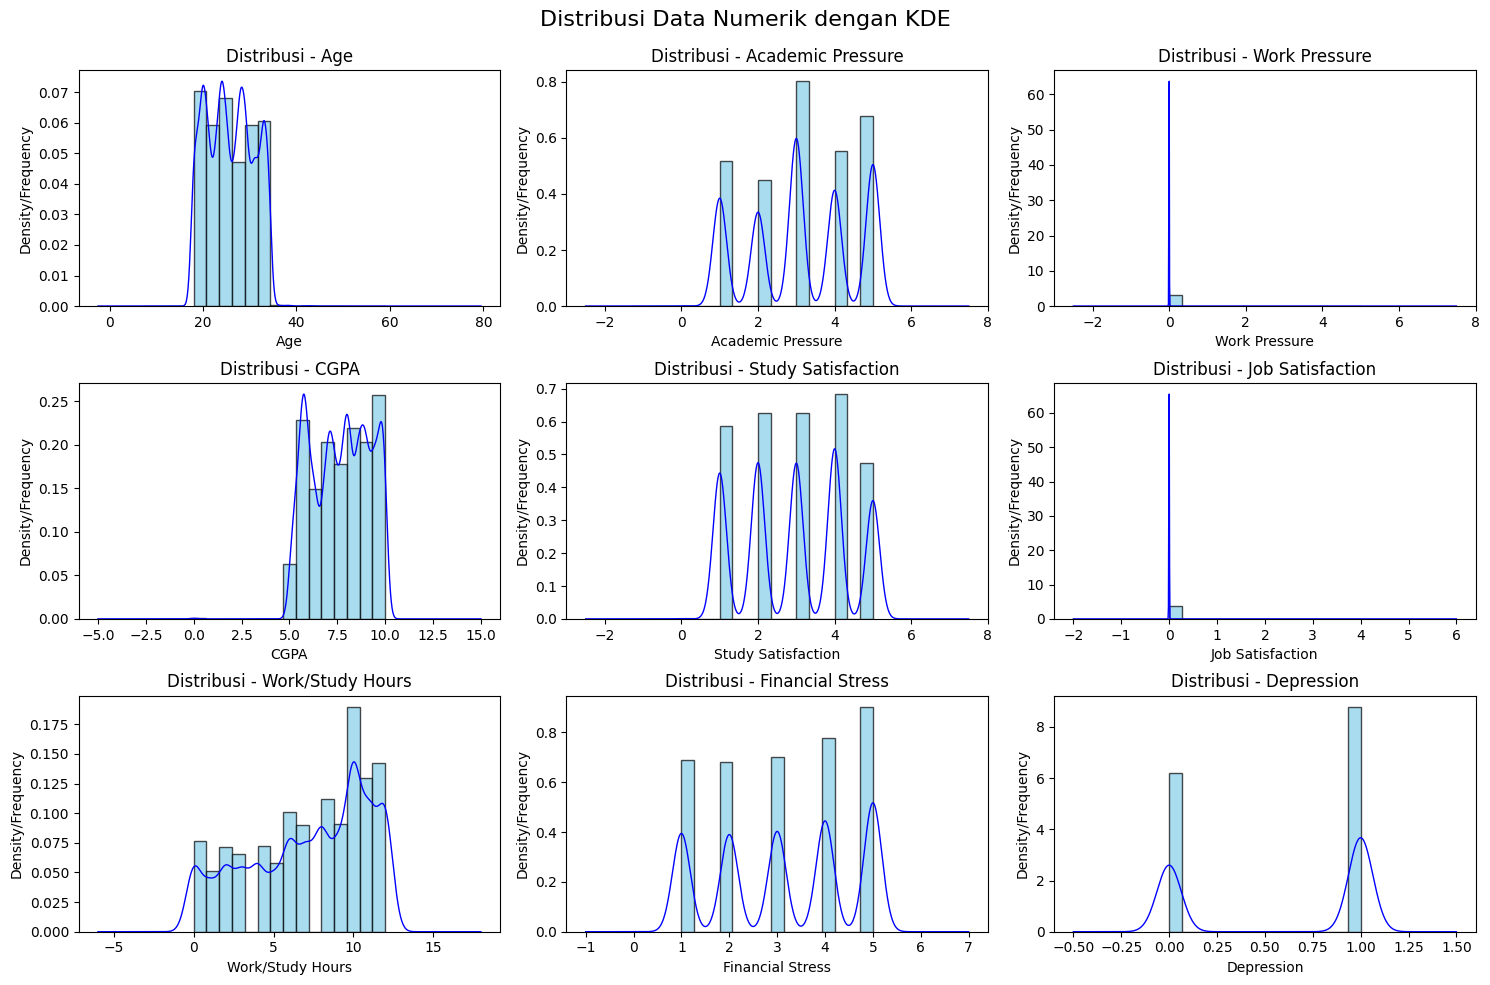

In [7]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot distribusi data numerik menggunakan histogram dengan garis KDE
plt.figure(figsize=(15, 10))

# Menentukan jumlah kolom untuk subplot
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols != 0 else 0)

# Membuat subplot untuk setiap kolom numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    # Plot histogram dengan KDE
    ax = df[col].plot(kind='hist', bins=15, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    df[col].plot(kind='kde', color='blue', linewidth=1)

    plt.title(f'Distribusi - {col}')
    plt.xlabel(col)
    plt.ylabel('Density/Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Menyesuaikan posisi title utama agar tidak tumpang tindih

plt.suptitle('Distribusi Data Numerik dengan KDE', fontsize=16)
plt.show()

## 4.2 Value Count untuk Data Kategorikal

<Figure size 1500x1000 with 0 Axes>

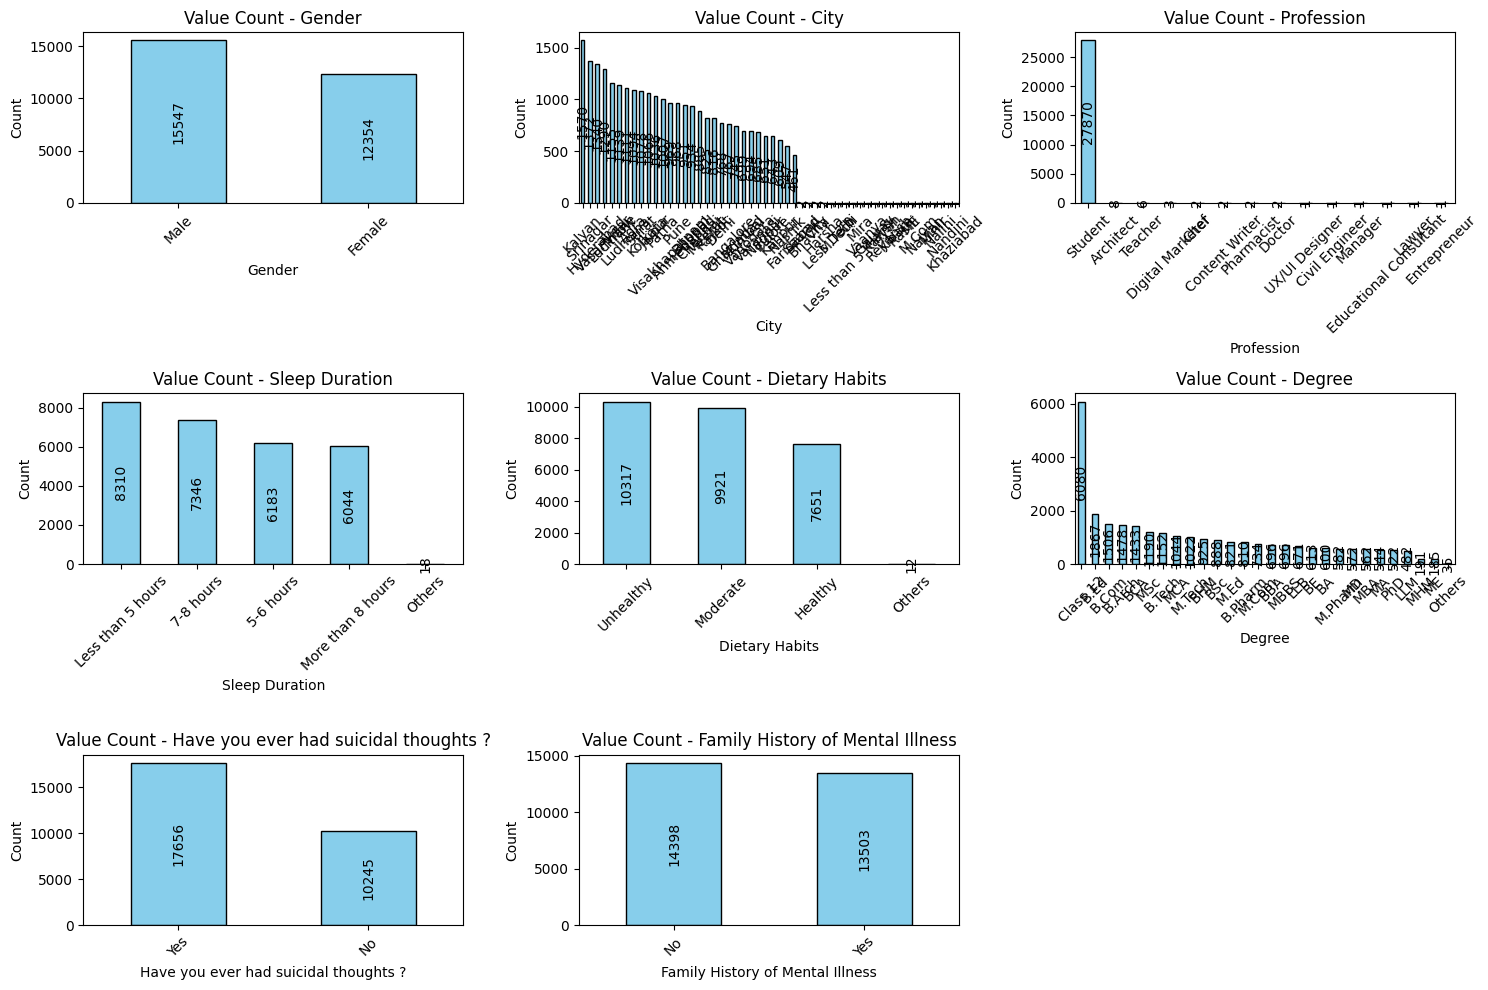

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot Value Counts untuk Data Kategorikal menggunakan bar plot
plt.figure(figsize=(15, 10))

# Menentukan jumlah kolom untuk subplot
n_cols = 3
n_rows = (len(categorical_columns) // n_cols) + (1 if len(categorical_columns) % n_cols != 0 else 0)

# Plot Value Counts untuk Data Kategorikal menggunakan bar plot dengan label pada setiap bar
plt.figure(figsize=(15, 10))

# Membuat subplot sesuai jumlah kolom kategorikal
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Value Count - {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Menambahkan label vertical di dalam bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
                    xytext=(0, 0),
                    textcoords='offset points',
                    ha='center', va='center',
                    fontsize=10, color='black', rotation=90)

plt.tight_layout()
plt.show()

## 4.3 Heatmap untuk Korelasi

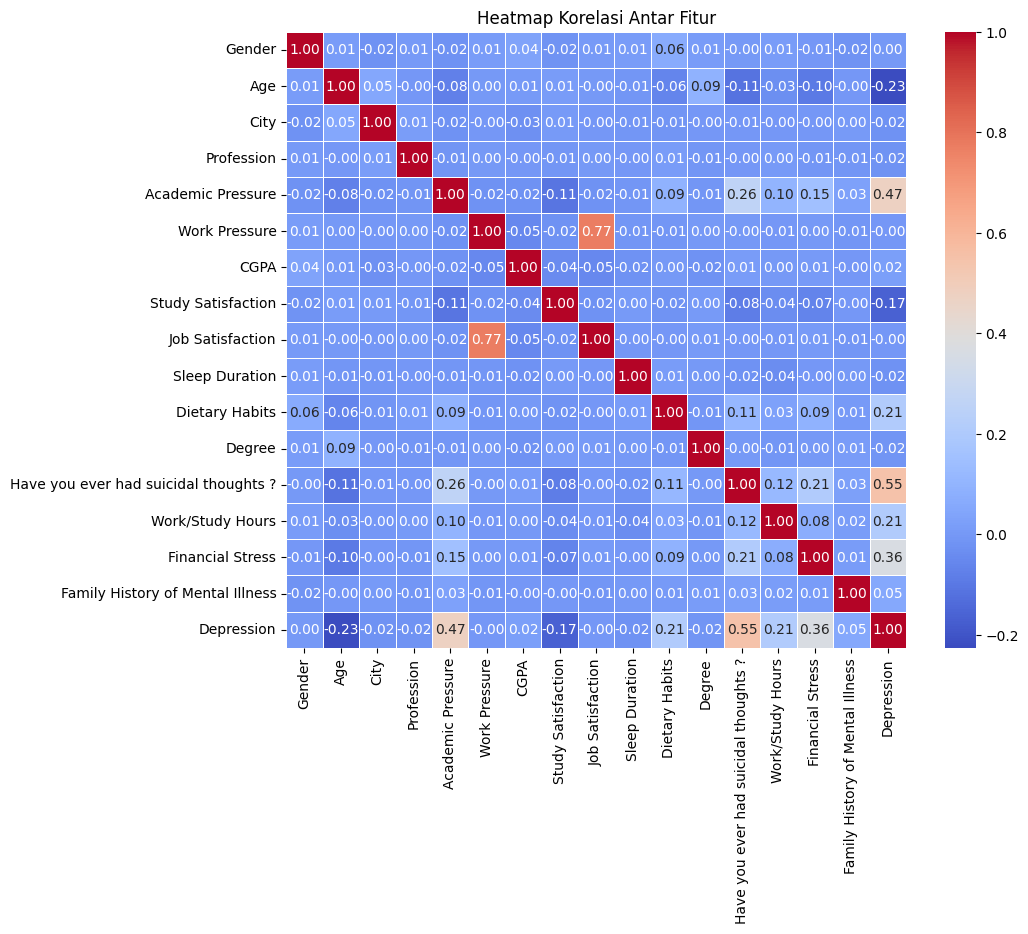

In [9]:
# 3. Label Encoding untuk Kolom Kategorikal
temp_df = df.copy()  # Temporary copy of df to apply label encoding

label_encoder = LabelEncoder()

# Encoding kolom kategorikal
for col in categorical_columns:
    temp_df[col] = label_encoder.fit_transform(temp_df[col])

# 4. Heatmap untuk Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = temp_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

## 4.4 Missing Value

In [10]:
# Cek Missing Value
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().mean() * 100)

In [11]:
# Membuat DataFrame untuk Missing Value
missing_values_df = pd.DataFrame({
    'Kolom': missing_values_count.index,
    'Missing Count': missing_values_count.values,
    'Percentage (%)': missing_values_percentage.values
})

In [12]:
missing_values_df

,Kolom,Missing Count,Percentage (%)
0,Gender,0,0.000000
1,Age,0,0.000000
2,City,0,0.000000
3,Profession,0,0.000000
4,Academic Pressure,0,0.000000
5,Work Pressure,0,0.000000
6,CGPA,0,0.000000
7,Study Satisfaction,0,0.000000
8,Job Satisfaction,0,0.000000
9,Sleep Duration,0,0.000000


## 4.5 Cek Duplicate Rows

In [13]:
# Cek Duplicate Rows
duplicate_count = df.duplicated().sum()
duplicate_percentage = (duplicate_count / len(df)) * 100

In [14]:
print(f"Duplicate Rows Count: {duplicate_count} ({duplicate_percentage:.2f}%)")

Duplicate Rows Count: 0 (0.00%)


## 4.6 Checking Outlier

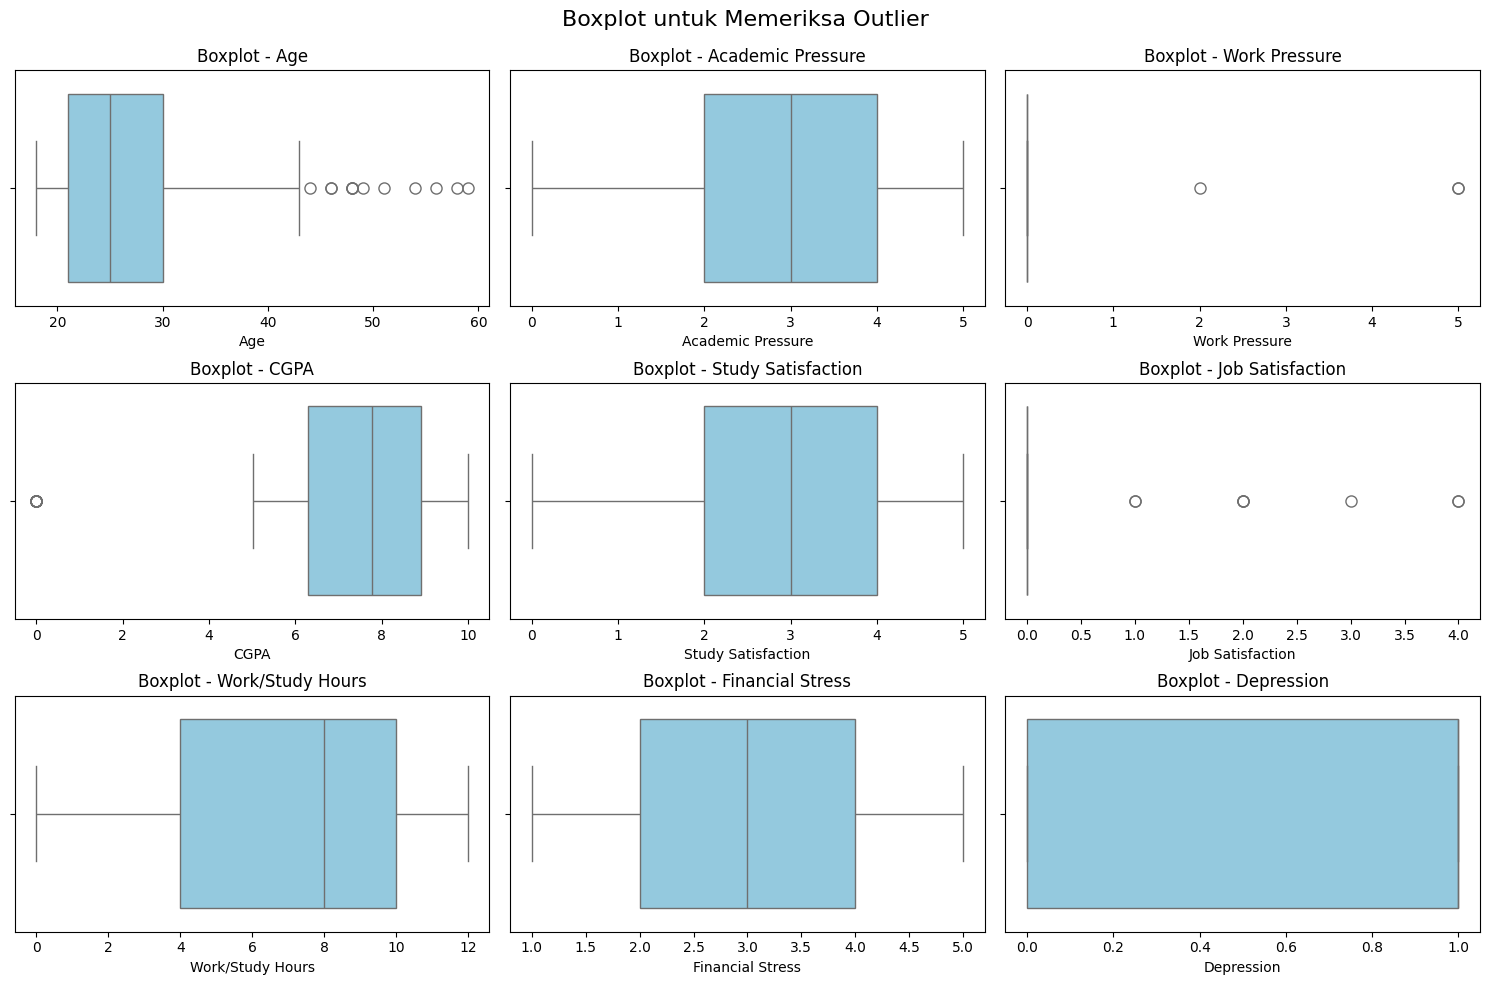

In [15]:
# Plot boxplot untuk memeriksa outlier pada setiap kolom numerik dengan perbaikan pada title
plt.figure(figsize=(15, 10))

# Menentukan jumlah kolom untuk subplot
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols != 0 else 0)

# Membuat subplot untuk setiap kolom numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue', fliersize=8)
    plt.title(f'Boxplot - {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Menyesuaikan posisi title utama agar tidak tumpang tindih
plt.suptitle('Boxplot untuk Memeriksa Outlier', fontsize=16)
plt.show()

In [16]:
# Cek Outlier dengan IQR (Interquartile Range)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

# Menampilkan hasil cek missing value, duplikat, dan outlier
missing_values = pd.DataFrame({
    'Missing Value Count': missing_values_count,
    'Missing Value Percentage': missing_values_percentage
})

print("Outlier Count (by IQR method):")
print(outliers)

Outlier Count (by IQR method):
Age                   12
Academic Pressure      0
Work Pressure          3
CGPA                   9
Study Satisfaction     0
Job Satisfaction       8
Work/Study Hours       0
Financial Stress       0
Depression             0
dtype: int64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika saya menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

## 5.1 Renaming columns

In [17]:
# Renaming columns dengan lebih singkat dan meaningful
df = df.rename(columns={
    'Academic Pressure': 'AcademicsPressure',
    'Work Pressure': 'WorkPressure',
    'Study Satisfaction': 'StudySatisfaction',
    'Job Satisfaction': 'JobSatisfaction',
    'Sleep Duration': 'SleepDuration',
    'Dietary Habits': 'EatingHabits',
    'Have you ever had suicidal thoughts ?': 'SuicidalThoughtsHistory',
    'Work/Study Hours': 'WorkStudyHours',
    'Financial Stress': 'FinancialStress',
    'Family History of Mental Illness': 'MentalIllnessFamilyHistory'
})

## 5.2 Dropping Unnecessary Values

In [18]:
# Print final shape of the DataFrame
print(f"Baris -> ({df.shape[0]}) dan Kolom -> ({df.shape[1]})")

Baris -> (27901) dan Kolom -> (17)


In [19]:
# Set threshold for removing low frequency values
threshold = 35  # Threshold to consider for removing values with low frequency

# Loop through all columns (both numerical and categorical)
for kolom in df.columns:
    # Calculate value counts for the column
    value_counts = df[kolom].value_counts()

    # Identify low-frequency values (below the threshold)
    low_freq_values = value_counts[value_counts < threshold].index

    # Remove rows where the column's value is one of the low-frequency values
    df = df[~df[kolom].isin(low_freq_values)]

    # Print value counts after removal
    print(f"{'='*4} Value Count for {kolom} kolom {'='*10}")
    display(df[kolom].value_counts())
    print('\n')

# Print final shape of the DataFrame
print(f"Baris -> ({df.shape[0]}) dan Kolom -> ({df.shape[1]})")

==== Value Count for Gender kolom ==========


,count
Gender,
Male,15547
Female,12354




==== Value Count for Age kolom ==========


,count
Age,
24.0,2258
20.0,2237
28.0,2133
29.0,1950
33.0,1893
25.0,1784
21.0,1726
23.0,1645
18.0,1587




==== Value Count for City kolom ==========


,count
City,
Kalyan,1567
Srinagar,1370
Hyderabad,1338
Vasai-Virar,1289
Lucknow,1153
Thane,1138
Ludhiana,1108
Agra,1091
Surat,1076




==== Value Count for Profession kolom ==========


,count
Profession,
Student,27795




==== Value Count for AcademicsPressure kolom ==========


,count
AcademicsPressure,
3.0,7430
5.0,6268
4.0,5142
1.0,4783
2.0,4165




==== Value Count for WorkPressure kolom ==========


,count
WorkPressure,
0.0,27788




==== Value Count for CGPA kolom ==========


,count
CGPA,
8.04,821
9.96,424
5.74,408
8.95,370
9.21,341
...,...
9.36,35
8.29,35
9.40,35




==== Value Count for StudySatisfaction kolom ==========


,count
StudySatisfaction,
4.0,5946
2.0,5460
3.0,5425
1.0,5077
5.0,4106




==== Value Count for JobSatisfaction kolom ==========


,count
JobSatisfaction,
0.0,26012




==== Value Count for SleepDuration kolom ==========


,count
SleepDuration,
Less than 5 hours,7773
7-8 hours,6861
5-6 hours,5725
More than 8 hours,5635




==== Value Count for EatingHabits kolom ==========


,count
EatingHabits,
Unhealthy,9657
Moderate,9238
Healthy,7089




==== Value Count for Degree kolom ==========


,count
Degree,
Class 12,5620
B.Ed,1769
B.Com,1406
B.Arch,1396
BCA,1349
MSc,1122
B.Tech,1094
MCA,969
M.Tech,961




==== Value Count for SuicidalThoughtsHistory kolom ==========


,count
SuicidalThoughtsHistory,
Yes,16476
No,9475




==== Value Count for WorkStudyHours kolom ==========


,count
WorkStudyHours,
10.0,3970
12.0,2935
11.0,2697
8.0,2324
6.0,2088
9.0,1899
7.0,1858
0.0,1590
4.0,1494




==== Value Count for FinancialStress kolom ==========


,count
FinancialStress,
5.0,6251
4.0,5376
3.0,4856
1.0,4754
2.0,4711




==== Value Count for MentalIllnessFamilyHistory kolom ==========


,count
MentalIllnessFamilyHistory,
No,13417
Yes,12534




==== Value Count for Depression kolom ==========


,count
Depression,
1,15237
0,10714




Baris -> (25951) dan Kolom -> (17)


## 5.3 Dropping Unnecessary Columns

In [20]:
# Menghapus Kolom Work Pressure Karena Mayoritas Siswa Tidak Mengalami Tekanan Kerja
df = df.drop(["JobSatisfaction", "WorkPressure", "Profession"], axis=1)

## 5.4 Handling Missing Value

In [21]:
display(df.isnull().sum()) # Missing value hanya ada pada kolom "FinancialStress", dan hanya 3 rows.
df = df.dropna() # Jadi langsung di dropna saja. Tidak akan ada masalah.

,0
Gender,0
Age,0
City,0
AcademicsPressure,0
CGPA,0
StudySatisfaction,0
SleepDuration,0
EatingHabits,0
Degree,0
SuicidalThoughtsHistory,0


## 5.5 Feature Engineering

In [22]:
# Update the mapping to only include 3 categories
degree_mapping = {
    'Class 12': 'Higher Secondary',
    'B.Ed': 'Undergraduate',
    'B.Com': 'Undergraduate',
    'B.Arch': 'Undergraduate',
    'BCA': 'Undergraduate',
    'MSc': 'Postgraduate',
    'B.Tech': 'Undergraduate',
    'MCA': 'Postgraduate',
    'M.Tech': 'Postgraduate',
    'BHM': 'Undergraduate',
    'BSc': 'Undergraduate',
    'M.Ed': 'Postgraduate',
    'B.Pharm': 'Undergraduate',
    'M.Com': 'Postgraduate',
    'BBA': 'Undergraduate',
    'MBBS': 'Postgraduate',
    'LLB': 'Postgraduate',
    'BA': 'Undergraduate',
    'BE': 'Undergraduate',
    'M.Pharm': 'Postgraduate',
    'MD': 'Postgraduate',
    'MBA': 'Postgraduate',
    'MA': 'Postgraduate',
    'PhD': 'Postgraduate',
    'LLM': 'Postgraduate',
    'ME': 'Postgraduate',
    'MHM': 'Postgraduate'
}

# Apply the new mapping
df["Degree_Category"] = df["Degree"].map(degree_mapping)

In [23]:
df = df.drop("Degree", axis=1)

## **5.6 Feature Selection**

In [25]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Gender', 'City', 'AcademicsPressure', 'SleepDuration', 'EatingHabits',
                       'SuicidalThoughtsHistory', 'MentalIllnessFamilyHistory', 'Degree_Category']
# Initialize a dictionary to store the encoders for each column
encoders = {}

# Apply encoding and store the encoders
for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder  # Store the encoder for each column

# Check the result
display(df.head())

,Gender,Age,City,AcademicsPressure,CGPA,StudySatisfaction,SleepDuration,EatingHabits,SuicidalThoughtsHistory,WorkStudyHours,FinancialStress,MentalIllnessFamilyHistory,Depression,Degree_Category
0,1,33.0,29,4,8.97,2.0,0,0,1,3.0,1.0,0,1,2
1,0,24.0,2,1,5.90,5.0,0,1,0,3.0,2.0,1,0,2
2,1,31.0,23,2,7.03,5.0,2,0,0,9.0,1.0,1,0,2
3,0,28.0,27,2,5.59,2.0,1,1,1,4.0,5.0,1,1,2
4,0,25.0,10,3,8.13,3.0,0,1,1,1.0,1.0,0,0,1


In [27]:
# Then you can proceed with splitting features and target for model training
X = df.drop(columns=['Depression'])
y = df['Depression']

# Fit the model
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [28]:
# Extract feature importance
feature_importance = model.feature_importances_

# Sorting the feature importance in descending order
sorted_idx_desc = feature_importance.argsort()[::-1]

X_selection = X.iloc[:, sorted_idx_desc[:10]]  # Select top 10 important features

In [29]:
feature_importance

array([0.01735824, 0.08542816, 0.07937665, 0.16594136, 0.09476062,
       0.04598814, 0.03674193, 0.03687028, 0.22140195, 0.07584244,
       0.09906379, 0.0168307 , 0.02439573])

In [30]:
sorted_idx_desc

array([ 8,  3, 10,  4,  1,  2,  9,  5,  7,  6, 12,  0, 11])

In [31]:
X_selection

,SuicidalThoughtsHistory,AcademicsPressure,FinancialStress,CGPA,Age,City,WorkStudyHours,StudySatisfaction,EatingHabits,SleepDuration
0,1,4,1.0,8.97,33.0,29,3.0,2.0,0,0
1,0,1,2.0,5.90,24.0,2,3.0,5.0,1,0
2,0,2,1.0,7.03,31.0,23,9.0,5.0,0,2
3,1,2,5.0,5.59,28.0,27,4.0,2.0,1,1
4,1,3,1.0,8.13,25.0,10,1.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...
27896,1,4,1.0,5.75,27.0,24,7.0,5.0,2,0
27897,0,1,3.0,9.40,27.0,15,0.0,3.0,0,2
27898,0,2,2.0,6.61,31.0,6,12.0,4.0,2,0
27899,1,4,5.0,6.88,18.0,15,10.0,2.0,0,2


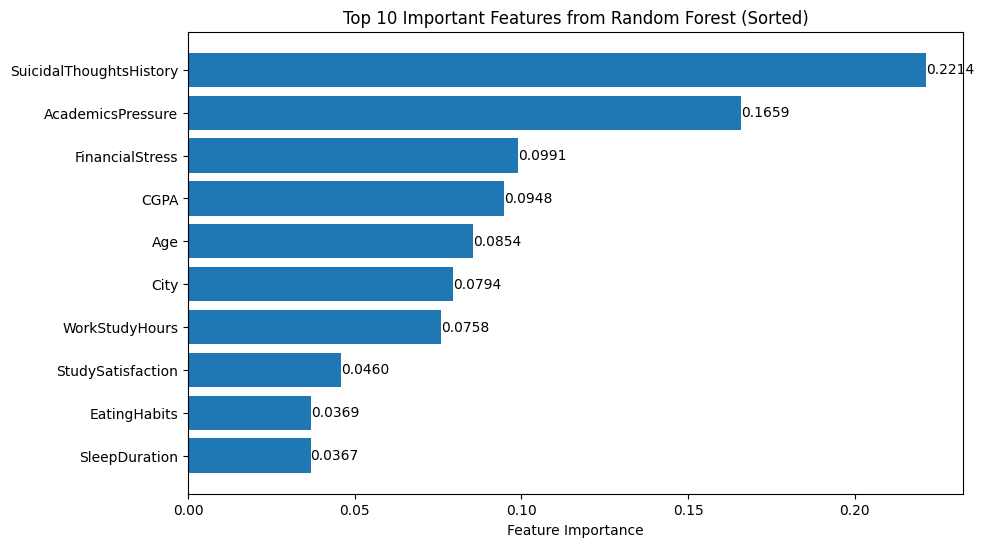

In [32]:
# Plot top 10 features with labels for each bar after sorting
plt.figure(figsize=(10, 6))
bars = plt.barh(X.columns[sorted_idx_desc[:10]], feature_importance[sorted_idx_desc[:10]])

# Label each bar with its feature importance value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10)

plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features from Random Forest (Sorted)')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

## 5.7 Inverse Transform

In [33]:
X_inverse_transform_selection = X_selection.copy()

In [34]:
# Now, decode the selected features in X_selection
for col in categorical_columns:
    if col in X_inverse_transform_selection.columns:  # Check if the column is in the selected features
        X_inverse_transform_selection[col] = encoders[col].inverse_transform(X_inverse_transform_selection[col])

# Now X_selection contains the original categorical values for the selected features
X_inverse_transform_selection.head()

,SuicidalThoughtsHistory,AcademicsPressure,FinancialStress,CGPA,Age,City,WorkStudyHours,StudySatisfaction,EatingHabits,SleepDuration
0,Yes,5.0,1.0,8.97,33.0,Visakhapatnam,3.0,2.0,Healthy,5-6 hours
1,No,2.0,2.0,5.90,24.0,Bangalore,3.0,5.0,Moderate,5-6 hours
2,No,3.0,1.0,7.03,31.0,Srinagar,9.0,5.0,Healthy,Less than 5 hours
3,Yes,3.0,5.0,5.59,28.0,Varanasi,4.0,2.0,Moderate,7-8 hours
4,Yes,4.0,1.0,8.13,25.0,Jaipur,1.0,3.0,Moderate,5-6 hours


In [ ]:
X_inverse_transform_selection["Depression"] = y

# 6. Saving Dataset After Processing

In [35]:
df.sample(5)

,Gender,Age,City,AcademicsPressure,CGPA,StudySatisfaction,SleepDuration,EatingHabits,SuicidalThoughtsHistory,WorkStudyHours,FinancialStress,MentalIllnessFamilyHistory,Depression,Degree_Category
8441,0,32.0,23,2,7.04,5.0,3,0,1,4.0,4.0,0,0,2
1679,0,26.0,22,4,6.08,2.0,2,2,0,12.0,5.0,0,1,1
17100,1,28.0,28,1,9.86,2.0,1,0,0,0.0,4.0,0,0,2
27150,1,30.0,10,1,9.24,5.0,1,0,0,1.0,5.0,0,0,2
23332,0,20.0,18,1,8.92,3.0,2,2,1,4.0,1.0,1,0,0


In [36]:
df.columns

Index(['Gender', 'Age', 'City', 'AcademicsPressure', 'CGPA',
       'StudySatisfaction', 'SleepDuration', 'EatingHabits',
       'SuicidalThoughtsHistory', 'WorkStudyHours', 'FinancialStress',
       'MentalIllnessFamilyHistory', 'Depression', 'Degree_Category'],
      dtype='object')

In [37]:
df.shape

(25948, 14)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25948 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      25948 non-null  int64  
 1   Age                         25948 non-null  float64
 2   City                        25948 non-null  int64  
 3   AcademicsPressure           25948 non-null  int64  
 4   CGPA                        25948 non-null  float64
 5   StudySatisfaction           25948 non-null  float64
 6   SleepDuration               25948 non-null  int64  
 7   EatingHabits                25948 non-null  int64  
 8   SuicidalThoughtsHistory     25948 non-null  int64  
 9   WorkStudyHours              25948 non-null  float64
 10  FinancialStress             25948 non-null  float64
 11  MentalIllnessFamilyHistory  25948 non-null  int64  
 12  Depression                  25948 non-null  int64  
 13  Degree_Category             25948 no

In [39]:
path_to_save

'/content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Eksperimen_SML_Rendika-nurhartanto-suharto/'

In [40]:
X_inverse_transform_selection.to_csv(os.path.join(path_to_save, 'preprocessing/student-depression-dataset_preprocessing.csv'), index=False)